# Model Evaluation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 !mkdir ~/.kaggle
 !cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
 !chmod 600 ~/.kaggle/kaggle.json
 


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#! kaggle datasets list
!kaggle datasets download -dmmek31/titantic
!unzip /content/titantic.zip

Archive:  /content/titantic.zip
  inflating: train.csv               


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


# Any results you write to the current directory are saved as output.

In [ ]:
train_df = pd.read_csv("train.csv")
train_df.shape


(891, 12)

In [ ]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
train_df.isna().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Data Cleaning

- Target: Survived
- PassengerId is unique id
- Age need to be imputed. How?
- Cabin can be droppd
- Embarked need bo imputed. How?
- Can be create title column with Name? Do you think title has any relationship with survival?

In [ ]:
num_cols=['Age','Fare']
cat_cols=['Plass','Sex','Sibsp','Parch','Ticket','Cabin','Embarked']

# Feature Engineering


- Create Title from Name 
- What can we do with Ticket? Can we use to create family size?

## Create Family Column

In [ ]:
family_size = dict(train_df.Ticket.value_counts())

In [ ]:
train_df['Family'] = train_df['Ticket'].map(family_size)

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


## Create Title Column

In [ ]:
train_df['Name'].str.split(' ').str[1]

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886     Rev.
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: Name, Length: 891, dtype: object

In [ ]:
train_df['Title'] = train_df['Name'].str.split(' ').str[1]

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Mr.


In [ ]:
# There are certain names where Title is at the Third place.
train_df.loc[ train_df['Name'].str.split(' ').str[2]=='Mr.', 'Title'] = 'Mr'

In [ ]:
train_df['Title'].value_counts()

Mr.             502
Miss.           179
Mrs.            121
Master.          40
Mr               12
Dr.               7
Rev.              6
y                 4
Mlle.             2
Planke,           2
Impe,             2
Col.              2
Major.            2
Gordon,           2
the               1
Capt.             1
Mme.              1
Messemaeker,      1
Ms.               1
der               1
Don.              1
Jonkheer.         1
Name: Title, dtype: int64

In [ ]:
wrong_title = ['y','Gordon,','Jonkheer.','Impe','Planke.','the','Impe,','Planke,']
train_df.loc[train_df['Title'].isin(wrong_title), 'Title'] = 'Mr'

In [ ]:
train_df['Title'].value_counts()

Mr.             502
Miss.           179
Mrs.            121
Master.          40
Mr               24
Dr.               7
Rev.              6
Major.            2
Mlle.             2
Col.              2
Don.              1
der               1
Mme.              1
Ms.               1
Messemaeker,      1
Capt.             1
Name: Title, dtype: int64

In [ ]:
Merge_title1 = ['Miss.', 'Ms.','Mlle.','Mme.','Messemaeker,']
train_df.loc[train_df['Title'].isin(Merge_title1), 'Title'] = 'Mrs.'

Merge_title2 = ['Dr.', 'Rev.','Major.','Col.','der', 'Capt.', 'Don.']
train_df.loc[train_df['Title'].isin(Merge_title2), 'Title'] = 'Prof.'

Merge_title3 = ['Mr']
train_df.loc[train_df['Title'].isin(Merge_title3), 'Title'] = 'Mr.'
train_df['Title'].value_counts()

Mr.        526
Mrs.       305
Master.     40
Prof.       20
Name: Title, dtype: int64

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Mrs.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,Prof.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Mrs.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2,Mrs.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Mr.


In [ ]:
train_df.drop(columns = ['Cabin','Name','PassengerId','Ticket'], inplace=True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title
0,0,3,male,22.0,1,0,7.2500,S,1,Mr.
1,1,1,female,38.0,1,0,71.2833,C,1,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,1,Mrs.
3,1,1,female,35.0,1,0,53.1000,S,2,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,1,Mr.
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,Prof.
887,1,1,female,19.0,0,0,30.0000,S,1,Mrs.
888,0,3,female,NaN,1,2,23.4500,S,2,Mrs.
889,1,1,male,26.0,0,0,30.0000,C,1,Mr.


## One Hot Encoding

In [ ]:
Pclass = pd.get_dummies(train_df['Pclass'], drop_first=True, prefix="Pclass")
Gender = pd.get_dummies(train_df['Sex'], drop_first=True)
Embarked = pd.get_dummies(train_df['Embarked'], drop_first=True, prefix="Embarked")
Title = pd.get_dummies(train_df['Title'], drop_first=True, prefix="Title")

train_df.drop(columns = ['Pclass','Sex','Embarked','Title'], inplace=True)


In [ ]:
train_df= pd.concat([train_df, Pclass, Gender, Embarked, Title], axis=1)

In [ ]:
train_df.head(5)

,Survived,Age,SibSp,Parch,Fare,Family,Pclass_2,Pclass_3,male,Embarked_Q,Embarked_S,Title_Mr.,Title_Mrs.,Title_Prof.
0,0,22.0,1,0,7.2500,1,0,1,1,0,1,1,0,0
1,1,38.0,1,0,71.2833,1,0,0,0,0,0,0,1,0
2,1,26.0,0,0,7.9250,1,0,1,0,0,1,0,1,0
3,1,35.0,1,0,53.1000,2,0,0,0,0,1,0,1,0
4,0,35.0,0,0,8.0500,1,0,1,1,0,1,1,0,0


In [ ]:
train_df[train_df.Age.isna()]

,Survived,Age,SibSp,Parch,Fare,Family,Pclass_2,Pclass_3,male,Embarked_Q,Embarked_S,Title_Mr.,Title_Mrs.,Title_Prof.
5,0,NaN,0,0,8.4583,1,0,1,1,1,0,1,0,0
17,1,NaN,0,0,13.0000,1,1,0,1,0,1,1,0,0
19,1,NaN,0,0,7.2250,1,0,1,0,0,0,0,1,0
26,0,NaN,0,0,7.2250,1,0,1,1,0,0,1,0,0
28,1,NaN,0,0,7.8792,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,NaN,0,0,7.2292,1,0,1,1,0,0,1,0,0
863,0,NaN,8,2,69.5500,7,0,1,0,0,1,0,1,0
868,0,NaN,0,0,9.5000,1,0,1,1,0,1,1,0,0
878,0,NaN,0,0,7.8958,1,0,1,1,0,1,1,0,0


## Null Value Imputation

In [ ]:
median_age = train_df['Age'].median()
train_df['Age'].fillna(median_age, inplace=True)

In [ ]:
train_df.isna().sum(axis=0)

Survived       0
Age            0
SibSp          0
Parch          0
Fare           0
Family         0
Pclass_2       0
Pclass_3       0
male           0
Embarked_Q     0
Embarked_S     0
Title_Mr.      0
Title_Mrs.     0
Title_Prof.    0
dtype: int64

# Splitting and Scaling

In [ ]:
X = train_df.iloc[:,1:]
y = train_df.iloc[:,0]

In [ ]:
X

,Age,SibSp,Parch,Fare,Family,Pclass_2,Pclass_3,male,Embarked_Q,Embarked_S,Title_Mr.,Title_Mrs.,Title_Prof.
0,22.0,1,0,7.2500,1,0,1,1,0,1,1,0,0
1,38.0,1,0,71.2833,1,0,0,0,0,0,0,1,0
2,26.0,0,0,7.9250,1,0,1,0,0,1,0,1,0
3,35.0,1,0,53.1000,2,0,0,0,0,1,0,1,0
4,35.0,0,0,8.0500,1,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,1,0,1,0,1,0,0,1
887,19.0,0,0,30.0000,1,0,0,0,0,1,0,1,0
888,28.0,1,2,23.4500,2,0,1,0,0,1,0,1,0
889,26.0,0,0,30.0000,1,0,0,1,0,0,1,0,0


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scaling helps to improve the convergence rate and performance of optimization algorithms. It helps removing the dominance of one variable over other.
# Scaling does not change the shape
# Minmax scaling is more senstive to outlier than standard scaling. Robust scaling (median based) is least senstive.
# Trying different scaling makes sense.

In [ ]:
X_train.loc[:,['Age','Fare']]

,Age,Fare
105,28.0,7.8958
68,17.0,7.9250
253,30.0,16.1000
320,22.0,7.2500
706,45.0,13.5000
...,...,...
835,39.0,83.1583
192,19.0,7.8542
629,28.0,7.7333
559,36.0,17.4000


In [ ]:
scaler = MinMaxScaler()
X_train.loc[:,['Age','Fare']] = scaler.fit_transform(X_train.loc[:,['Age','Fare']])
X_test.loc[:,['Age','Fare']]  = scaler.transform(X_test.loc[:,['Age','Fare']])


In [ ]:
X_train

,Age,SibSp,Parch,Fare,Family,Pclass_2,Pclass_3,male,Embarked_Q,Embarked_S,Title_Mr.,Title_Mrs.,Title_Prof.
105,0.344510,0,0,0.015412,1,0,1,1,0,1,1,0,0
68,0.205849,4,2,0.015469,1,0,1,0,0,1,0,1,0
253,0.369721,1,0,0.031425,2,0,1,1,0,1,1,0,0
320,0.268877,0,0,0.014151,1,0,1,1,0,1,1,0,0
706,0.558805,0,0,0.026350,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.483172,1,1,0.162314,1,0,0,0,0,0,0,1,0
192,0.231060,1,0,0.015330,1,0,1,0,0,1,0,1,0
629,0.344510,0,0,0.015094,1,0,1,1,1,0,1,0,0
559,0.445355,1,0,0.033963,1,0,1,0,0,1,0,1,0


# Metric Selection
- Survival =1, 
- Non-Survival (0) Predicted as Survival (1). False Positive
- Actual Survival (1) Predicted as Non-Survival (0). False Negative
- Actual Survival (1) predicted as Survived (1). True Positive.
- Non-Survival (0) Predicted as Non-Survival (0). True Negative.

False Positive - To Reduce this we need to improve Precision.   
False Negative - To Reduce this we need to improve Recall. 

# Model Building

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.84
Accuracy of Logistic regression classifier on test set: 0.81


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.80


In [ ]:
# K-Nearest Neighbour (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.81


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.81
Accuracy of GNB classifier on test set: 0.79


In [ ]:
# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.84
Accuracy of SVM classifier on test set: 0.82


In [ ]:
# Random forest.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=10, random_state=0)

rf.fit(X_train, y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.98
Accuracy of Random Forest classifier on test set: 0.84


In [ ]:
# Ada Boost.
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(n_estimators=500)

ab.fit(X_train, y_train)
print('Accuracy of Ada Boost classifier on training set: {:.2f}'
     .format(ab.score(X_train, y_train)))
print('Accuracy of Ada Boost classifier on test set: {:.2f}'
     .format(ab.score(X_test, y_test)))

Accuracy of Ada Boost classifier on training set: 0.89
Accuracy of Ada Boost classifier on test set: 0.81


In [ ]:
# XGBoost
from xgboost import XGBClassifier
xb = XGBClassifier(n_estimators=500)
xb.fit(X_train, y_train)
print('Accuracy of XG Boost classifier on training set: {:.2f}'
     .format(xb.score(X_train, y_train)))
print('Accuracy of XG Boost classifier on test set: {:.2f}'
     .format(xb.score(X_test, y_test)))

Accuracy of XG Boost classifier on training set: 0.98
Accuracy of XG Boost classifier on test set: 0.82


<h2> Evaluating Different Models </h2>

In [ ]:
# Plot Confusion Matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[124  15]
 [ 21  63]]
Normalized confusion matrix
[[0.89 0.11]
 [0.25 0.75]]


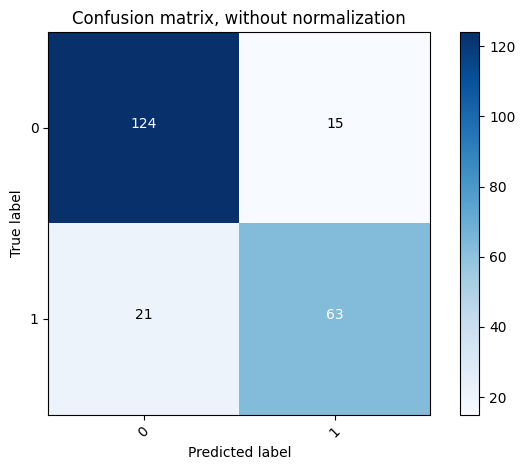

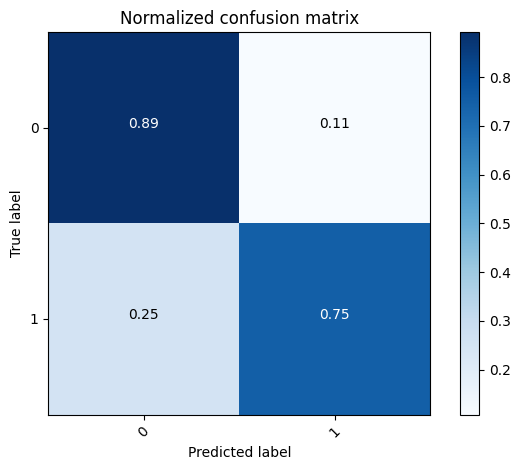

[[124  15]
 [ 21  63]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       139
           1       0.81      0.75      0.78        84

    accuracy                           0.84       223
   macro avg       0.83      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223



In [ ]:
# Confusion Matrix for RF
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = rf.predict(X_test)

cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print(cnf_matrix)
print(classification_report(y_test, pred))